## TESTE MACHINE LEARNING FAKE RECOGNA

In [1]:
import pandas as pd
import nltk.corpus
import re
import string
import spacy

In [2]:
df2 = pd.read_excel('FakeRecogna.xlsx')
df2 = df2[['Noticia','Classe']]
df2 = df2.dropna()
df2['Classe'] = df2['Classe'].astype(int)
df2

,Noticia,Classe
0,apagão vaticano papar presar acusação tráfico ...,0
1,o governar equador anunciar preparar cova cole...,1
2,o companhia air france operar voar direto pequ...,1
3,o marfrig global foods retomar vender carnar b...,1
4,o assunto voltar o compartilhar rede social ju...,0
...,...,...
11898,argentino marcar tendência mundial vacinar o c...,0
11899,o ministrar saudar marcelo queiroga e represen...,1
11900,o vídeo recentemente publicar página “ 18:18 ”...,0
11901,parir afp o frança impor tocar recolher o 20h ...,1


In [3]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [4]:
stopwords_br = nltk.corpus.stopwords.words('portuguese')
#stopwords_br

In [5]:
df2['Noticia'] = df2['Noticia'].apply(wordopt)
df2['Noticia'] = df2['Noticia'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_br]))
df2

,Noticia,Classe
0,apagão vaticano papar presar acusação tráfico ...,0
1,governar equador anunciar preparar cova coleti...,1
2,companhia air france operar voar direto pequim...,1
3,marfrig global foods retomar vender carnar bov...,1
4,assunto voltar compartilhar rede social julho ...,0
...,...,...
11898,argentino marcar tendência mundial vacinar car...,0
11899,ministrar saudar marcelo queiroga representant...,1
11900,vídeo recentemente publicar página facebook ar...,0
11901,parir afp frança impor tocar recolher locar en...,1


In [6]:
df2 = df2.rename(columns={'Classe':'label'})
df2

,Noticia,label
0,apagão vaticano papar presar acusação tráfico ...,0
1,governar equador anunciar preparar cova coleti...,1
2,companhia air france operar voar direto pequim...,1
3,marfrig global foods retomar vender carnar bov...,1
4,assunto voltar compartilhar rede social julho ...,0
...,...,...
11898,argentino marcar tendência mundial vacinar car...,0
11899,ministrar saudar marcelo queiroga representant...,1
11900,vídeo recentemente publicar página facebook ar...,0
11901,parir afp frança impor tocar recolher locar en...,1


## TREINAMENTO

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [48]:
X = df2['Noticia']  # Coluna com o texto das notícias
y = df2['label']  # Coluna com os rótulos (0 para falsa, 1 para verdadeira)


# Vetorização dos recursos usando TF-IDF
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Acurácia: 0.8887022259554809
Precisão: 0.8989048020219039
Recall: 0.8803630363036303
F1-score: 0.8895373072113381


In [43]:
models = [
    MultinomialNB(),
    SVC(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),

    LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier(),
    XGBClassifier()
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

    # Cálculo da matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print("Matriz de Confusão:")
    print(confusion)
    print()

Modelo: MultinomialNB
Acurácia: 0.8887022259554809
Precisão: 0.8989048020219039
Recall: 0.8803630363036303
F1-score: 0.8895373072113381

Matriz de Confusão:
[[1049  120]
 [ 145 1067]]

Modelo: SVC
Acurácia: 0.9239815203695926
Precisão: 0.923582580115037
Recall: 0.9273927392739274
F1-score: 0.9254837381638534

Matriz de Confusão:
[[1076   93]
 [  88 1124]]

Modelo: KNeighborsClassifier
Acurácia: 0.6673666526669466
Precisão: 0.9007633587786259
Recall: 0.38943894389438943
F1-score: 0.543778801843318

Matriz de Confusão:
[[1117   52]
 [ 740  472]]

Modelo: GradientBoostingClassifier
Acurácia: 0.8899622007559849
Precisão: 0.8998316498316499
Recall: 0.8820132013201321
F1-score: 0.8908333333333334

Matriz de Confusão:
[[1050  119]
 [ 143 1069]]

Modelo: LogisticRegression
Acurácia: 0.9294414111717766
Precisão: 0.9299835255354201
Recall: 0.9315181518151815
F1-score: 0.930750206100577

Matriz de Confusão:
[[1084   85]
 [  83 1129]]

Modelo: RandomForestClassifier
Acurácia: 0.9168416631667367
Pr

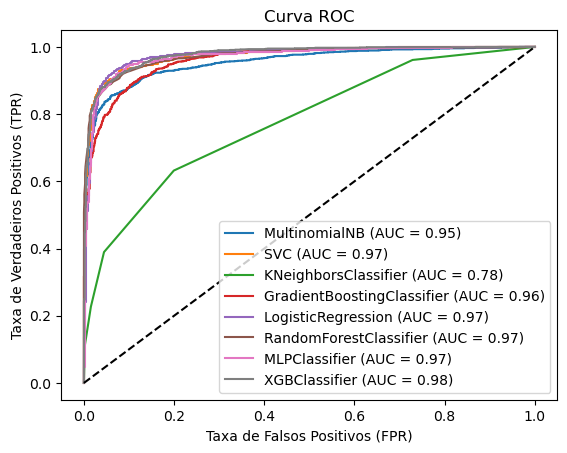

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

for model in models:
    model.fit(X_train, y_train)
    
    # Verificar se o modelo suporta cálculo de probabilidade
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))
    else:
        # Se o modelo não suportar cálculo de probabilidade, use a função de decisão para calcular as pontuações
        y_scores = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

MultinomialNB()


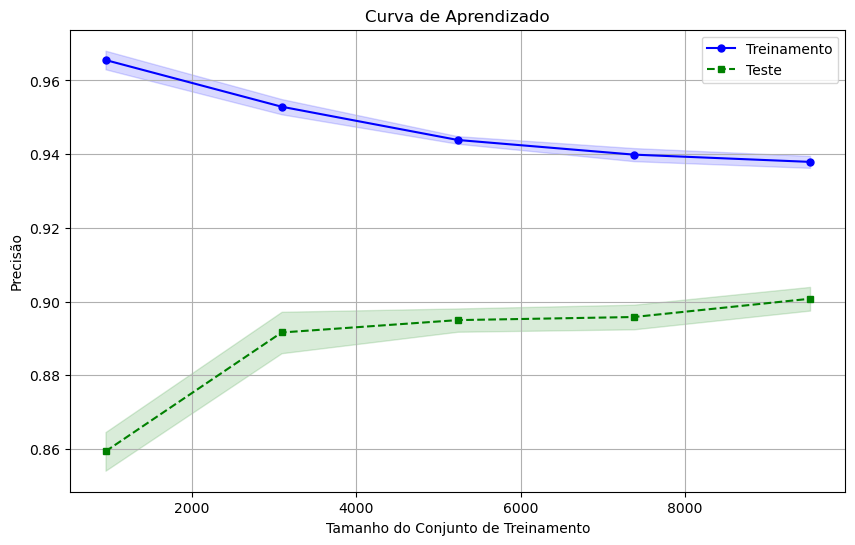

SVC()


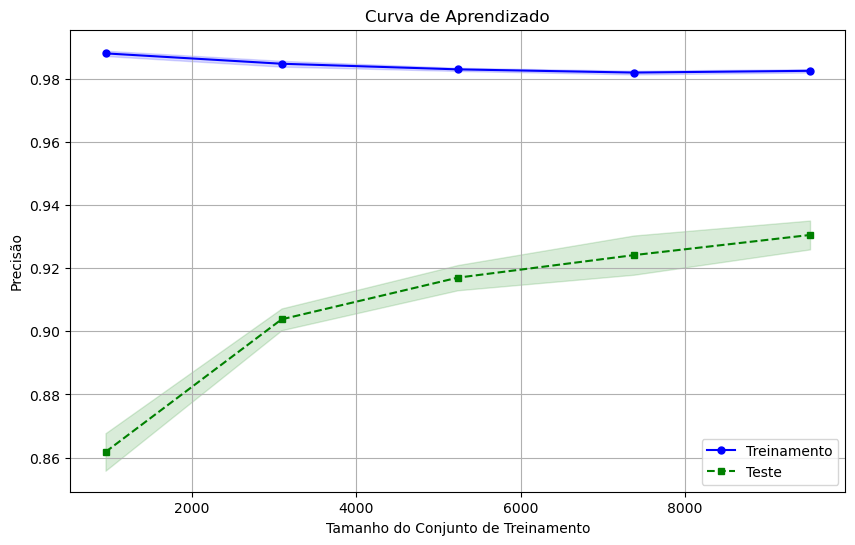

KNeighborsClassifier()


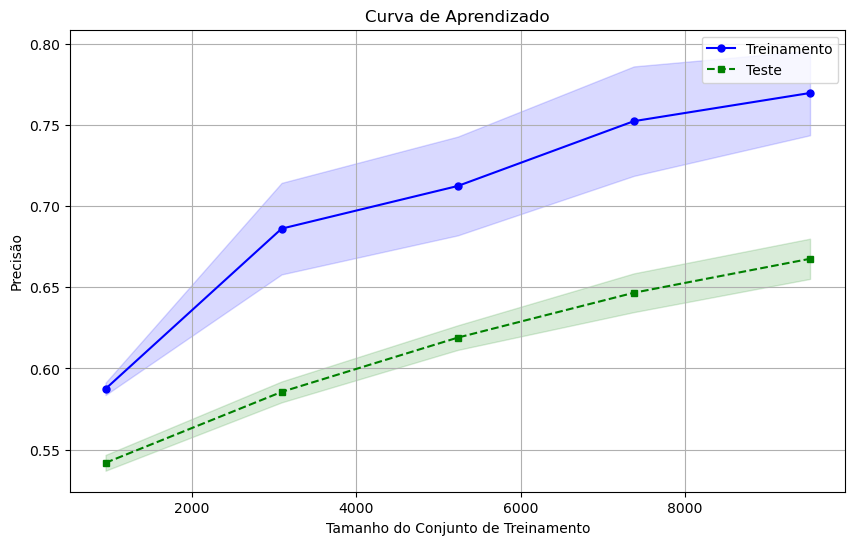

GradientBoostingClassifier()


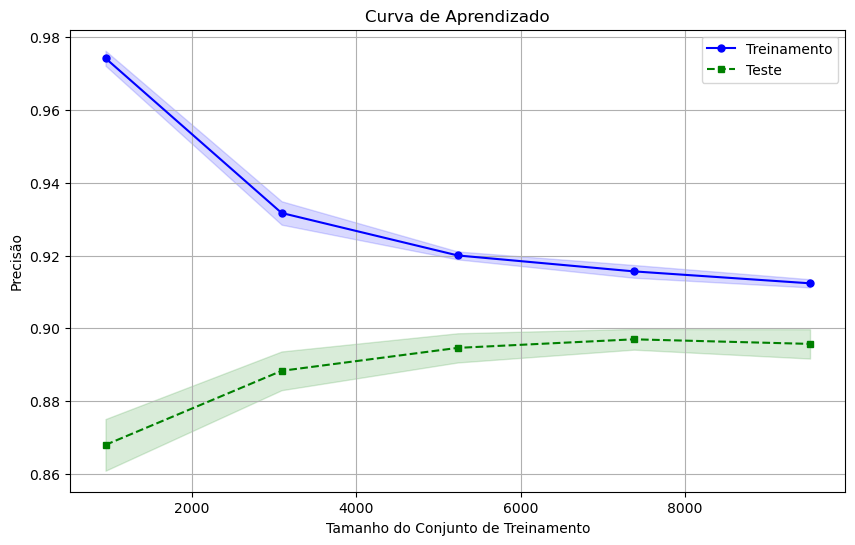

LogisticRegression()


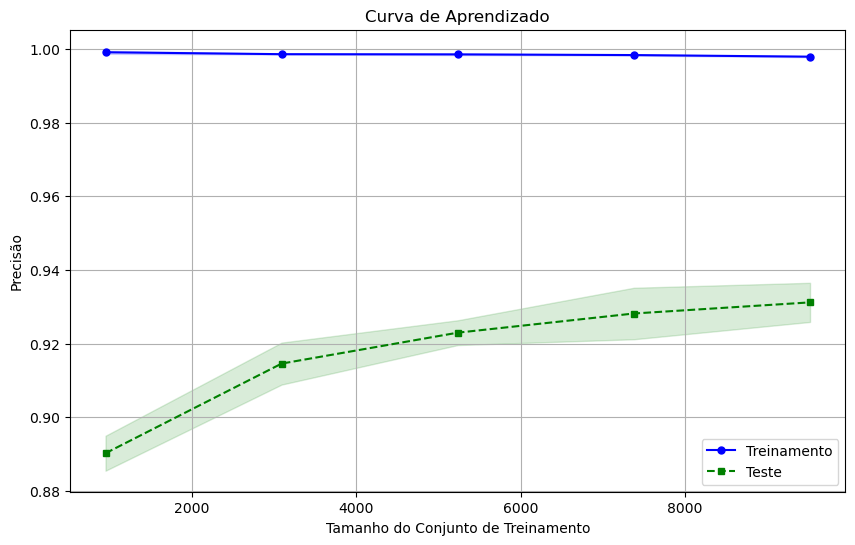

RandomForestClassifier()


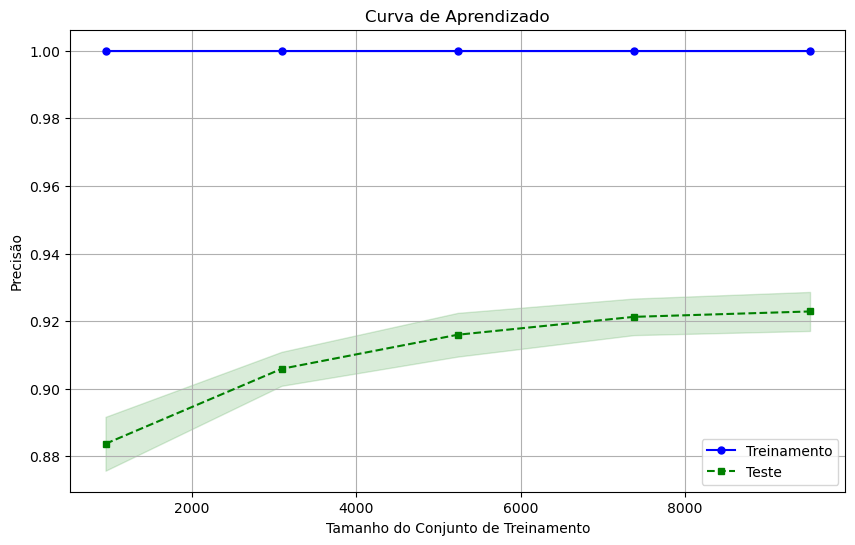

MLPClassifier()


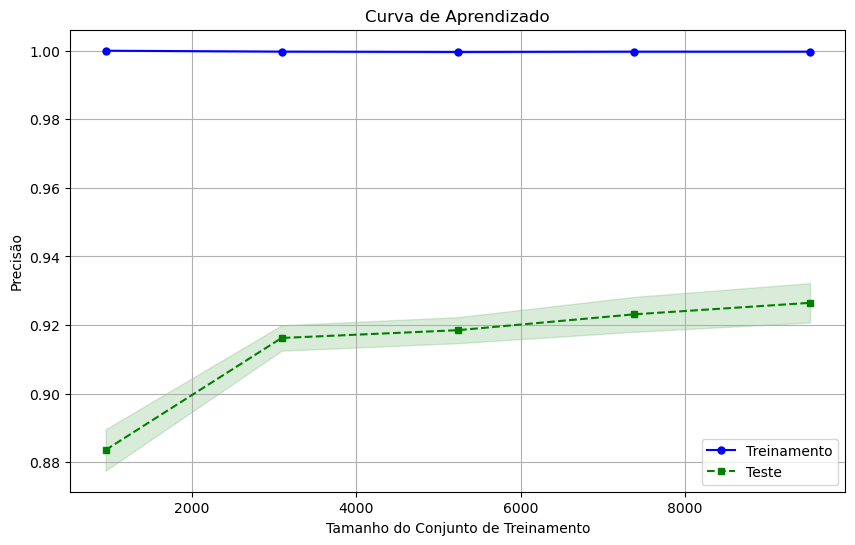

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


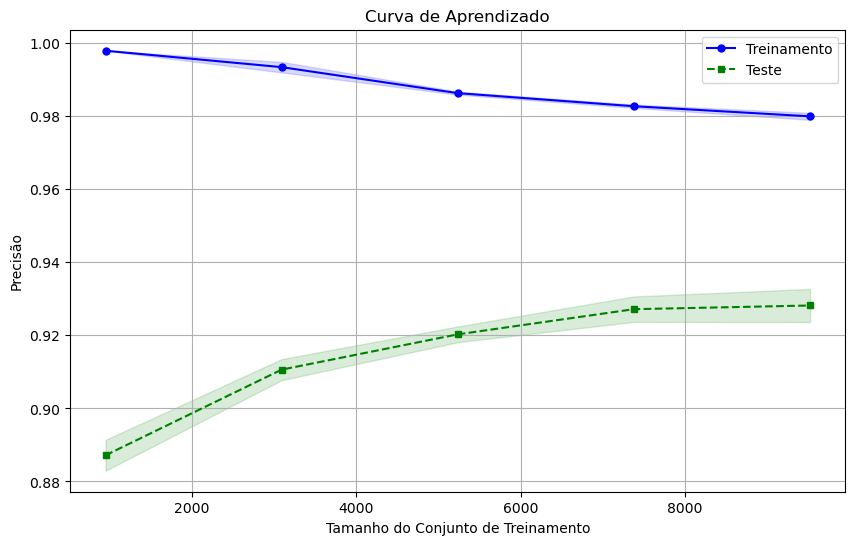

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Média e desvio padrão dos scores de treinamento e teste
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plotagem da curva de aprendizado
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Treinamento')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Teste')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    print(model)
    plt.title('Curva de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Precisão')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Plotar curvas de aprendizado para cada modelo
for model in models:
    plot_learning_curve(model, X, y)

In [22]:
models = [
    MultinomialNB(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

Modelo: MultinomialNB
Acurácia: 0.8887022259554809
Precisão: 0.8989048020219039
Recall: 0.8803630363036303
F1-score: 0.8895373072113381

Modelo: GradientBoostingClassifier
Acurácia: 0.8895422091558168
Precisão: 0.8997472620050547
Recall: 0.8811881188118812
F1-score: 0.8903709879116298

Modelo: XGBClassifier
Acurácia: 0.9193616127677446
Precisão: 0.9257095158597662
Recall: 0.915016501650165
F1-score: 0.9203319502074688



In [49]:
models = [
    #MultinomialNB(),
    SVC(),
    KNeighborsClassifier(),
    #GradientBoostingClassifier(),

    LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier(),
    #XGBClassifier()
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

    # Cálculo da matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print("Matriz de Confusão:")
    print(confusion)
    print()

Modelo: SVC
Acurácia: 0.9239815203695926
Precisão: 0.923582580115037
Recall: 0.9273927392739274
F1-score: 0.9254837381638534

Matriz de Confusão:
[[1076   93]
 [  88 1124]]

Modelo: KNeighborsClassifier
Acurácia: 0.6673666526669466
Precisão: 0.9007633587786259
Recall: 0.38943894389438943
F1-score: 0.543778801843318

Matriz de Confusão:
[[1117   52]
 [ 740  472]]

Modelo: LogisticRegression
Acurácia: 0.9294414111717766
Precisão: 0.9299835255354201
Recall: 0.9315181518151815
F1-score: 0.930750206100577

Matriz de Confusão:
[[1084   85]
 [  83 1129]]

Modelo: RandomForestClassifier
Acurácia: 0.9210415791684167
Precisão: 0.9331641285956007
Recall: 0.9100660066006601
F1-score: 0.9214703425229742

Matriz de Confusão:
[[1090   79]
 [ 109 1103]]

Modelo: MLPClassifier
Acurácia: 0.9227215455690886
Precisão: 0.9240924092409241
Recall: 0.9240924092409241
F1-score: 0.9240924092409241

Matriz de Confusão:
[[1077   92]
 [  92 1120]]



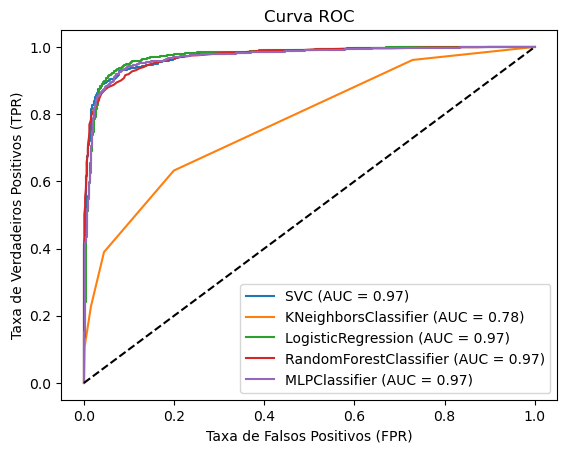

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

for model in models:
    model.fit(X_train, y_train)
    
    # Verificar se o modelo suporta cálculo de probabilidade
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))
    else:
        # Se o modelo não suportar cálculo de probabilidade, use a função de decisão para calcular as pontuações
        y_scores = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## TESTANDO BASE FALSA

In [13]:
def manual_testing2(model,news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)

    nlp = spacy.load('pt_core_news_sm')
    doc = nlp(new_def_test["text"].iloc[0])
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    new_x_test = [lemmatized_text]
    
    #new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_LR = model.predict(new_xv_test)
    #pred_NB = NB.predict(new_xv_test)
   

    return pred_LR

In [18]:
nlp = spacy.load('pt_core_news_sm')

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

In [17]:
teste = pd.read_csv('pre-processed.csv',sep=';')
teste = teste[['preprocessed_news','label']]
teste = teste.dropna()
teste['label'] = teste['label'].astype(int)
teste

,preprocessed_news,label
0,katia abreu diz vai colocar expulsao moldura n...,0
1,ray peita bolsonaro conservador fake entrevist...,0
2,reinaldo azevedo desmascarado policia federal ...,0
3,relatorio assustador bndes mostra dinheiro pub...,0
4,radialista americano fala sobre pt vendem ilus...,0
...,...,...
7196,jornal britanico acao contra lula lava jato se...,1
7197,temer diz acionou pf cade investigar aumentos ...,1
7198,obstaculos politicos temer especialistas ouvid...,1
7199,setembro boa noite aqui estao principais notic...,1


In [19]:
teste['preprocessed_news'] = teste['preprocessed_news'].apply(lemmatize_text)

In [20]:
teste = teste.rename(columns={'preprocessed_news': 'Noticia'})
testefake = teste[teste['label']==0]
testefake

,Noticia,label
0,katia abrer dizer ir colocar expulsao moldura ...,0
1,Ray peito bolsonaro conservador Fake Entrevist...,0
2,reinaldo azevedo desmascarar policia federal f...,0
3,relatorio assustador bnde mostrar dinheiro pub...,0
4,radialista americano falar sobre pt vender ilu...,0
...,...,...
3595,ft julgamento populista usar dinheiro publico ...,0
3596,nota fiscal emitir petrobra mostrar gasolina v...,0
3597,estao estancar sangr bem debaixo nariz lembrar...,0
3598,rj cidadao fingir estar possuido pomba giro es...,0


In [51]:
for model in models:
    
    print(model)
    fake = 0
    true = 0

    for i in testefake['Noticia']:
        x = manual_testing2(model,i)
        if x == 0:
            #print('Fake News')
            fake += 1
        else:
            #print('Not a Fake News')
            true += 1

    print('Fake: ',fake)
    print('True: ',true)

SVC()
Fake:  2139
True:  1461
KNeighborsClassifier()
Fake:  3347
True:  253
LogisticRegression()
Fake:  2337
True:  1263
RandomForestClassifier()
Fake:  1899
True:  1701
MLPClassifier()
Fake:  2542
True:  1058


## TESTANDO BASE VERDADEIRA

In [26]:
testetrue = teste[teste['label']==1]
testetrue

,Noticia,label
3600,poder decidir expulsar deputado federal Carlos...,1
3601,bolsonaro liberal completo dizer presidente ps...,1
3602,ministro stf libero andreo neves prisaor domic...,1
3603,apesar abundancia crescer preocupacao preserva...,1
3605,harvard mit levarao dilma Moro suplicy eua meg...,1
...,...,...
7196,jornal britanico acao contra Lula lava jato se...,1
7197,temer dizer acionar pf cade investigar aumento...,1
7198,obstaculo politico temer especialista ouvir av...,1
7199,setembro bom noite aqui estao principal notici...,1


In [52]:
for model in models:
    
    print(model)
    fake = 0
    true = 0

    for i in testetrue['Noticia']:
        x = manual_testing2(model,i)
        if x == 0:
            #print('Fake News')
            fake += 1
        else:
            #print('Not a Fake News')
            true += 1

    print('Fake: ',fake)
    print('True: ',true)

SVC()
Fake:  61
True:  3539
KNeighborsClassifier()
Fake:  1970
True:  1630
LogisticRegression()
Fake:  312
True:  3288
RandomForestClassifier()
Fake:  158
True:  3442
MLPClassifier()
Fake:  1181
True:  2419


## TREINAMENTO TF-IDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df2['Noticia']  # Coluna com o texto das notícias
y = df2['label']  # Coluna com os rótulos (0 para falsa, 1 para verdadeira)

# Vetorização dos recursos usando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
models = [
    MultinomialNB(),
    SVC(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),

    LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier(),
    XGBClassifier()
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

    # Cálculo da matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print("Matriz de Confusão:")
    print(confusion)
    print()

Modelo: MultinomialNB
Acurácia: 0.884502309953801
Precisão: 0.8709422011084719
Recall: 0.9075907590759076
F1-score: 0.888888888888889

Matriz de Confusão:
[[1006  163]
 [ 112 1100]]

Modelo: SVC
Acurácia: 0.9307013859722806
Precisão: 0.9245742092457421
Recall: 0.9405940594059405
F1-score: 0.9325153374233128

Matriz de Confusão:
[[1076   93]
 [  72 1140]]

Modelo: KNeighborsClassifier
Acurácia: 0.8345233095338094
Precisão: 0.8089123867069486
Recall: 0.8836633663366337
F1-score: 0.8446372239747635

Matriz de Confusão:
[[ 916  253]
 [ 141 1071]]

Modelo: GradientBoostingClassifier
Acurácia: 0.8920621587568248
Precisão: 0.9036348267117498
Recall: 0.8820132013201321
F1-score: 0.8926931106471816

Matriz de Confusão:
[[1055  114]
 [ 143 1069]]

Modelo: LogisticRegression
Acurácia: 0.9160016799664007
Precisão: 0.9127243066884176
Recall: 0.9232673267326733
F1-score: 0.9179655455291222

Matriz de Confusão:
[[1062  107]
 [  93 1119]]

Modelo: RandomForestClassifier
Acurácia: 0.9197816043679127
Pr

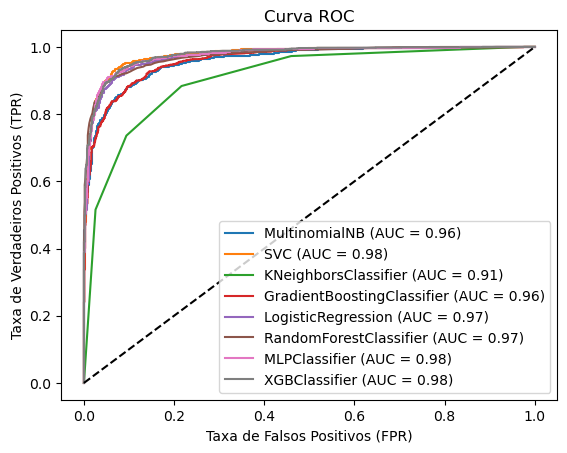

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

for model in models:
    model.fit(X_train, y_train)
    
    # Verificar se o modelo suporta cálculo de probabilidade
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))
    else:
        # Se o modelo não suportar cálculo de probabilidade, use a função de decisão para calcular as pontuações
        y_scores = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

MultinomialNB()


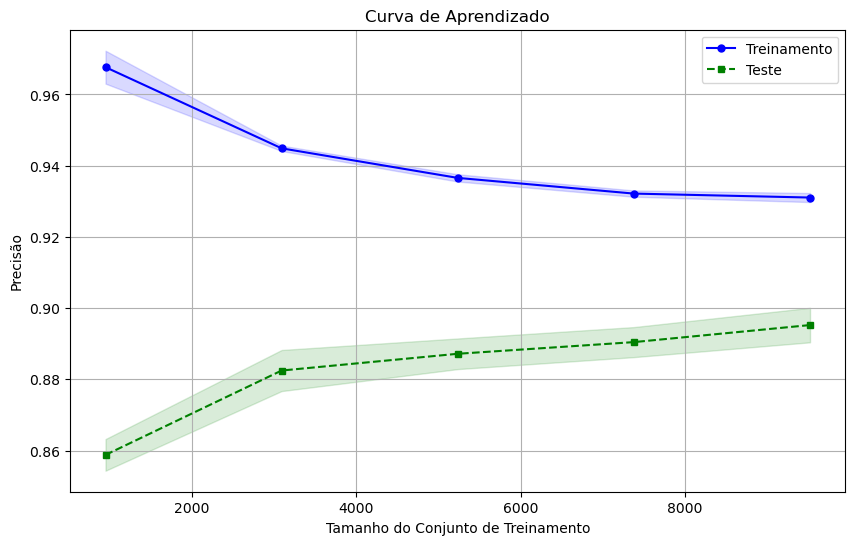

SVC()


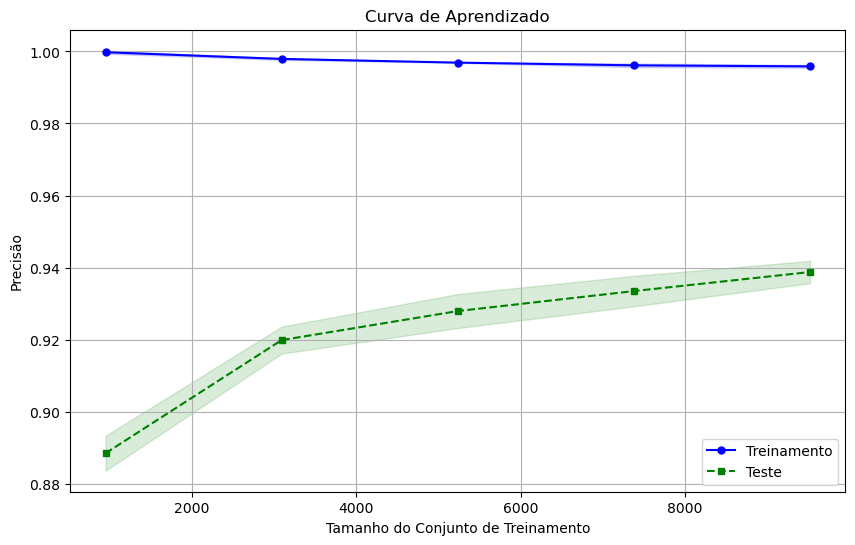

KNeighborsClassifier()


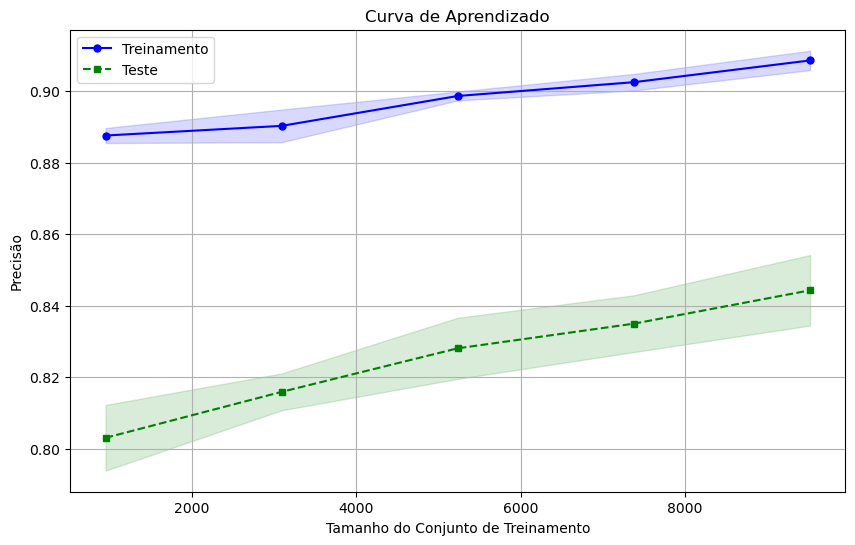

GradientBoostingClassifier()


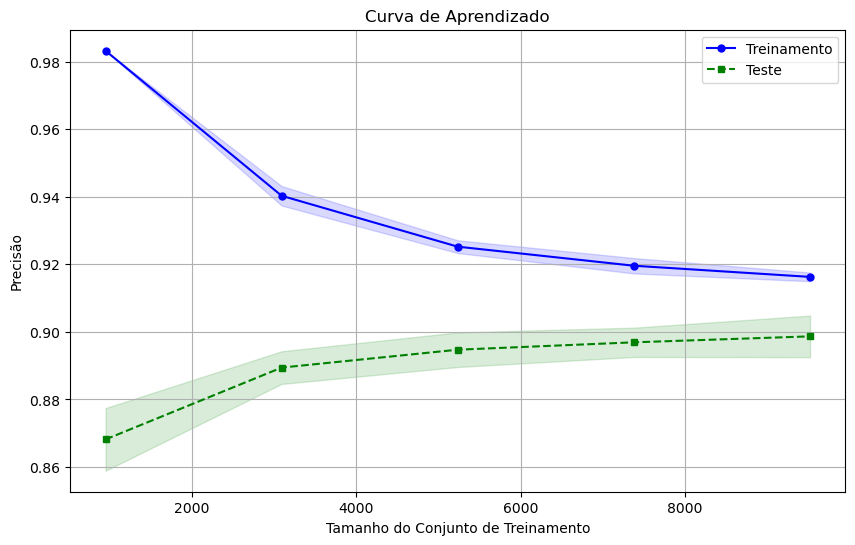

LogisticRegression()


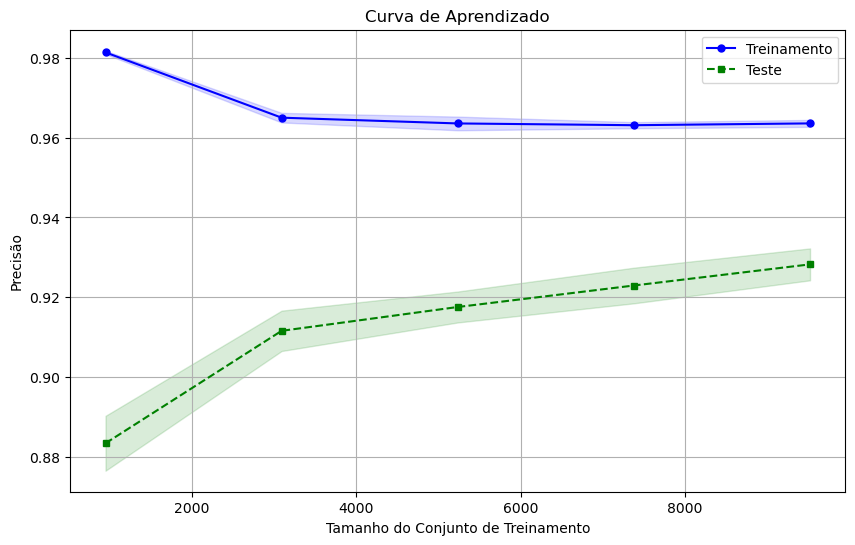

RandomForestClassifier()


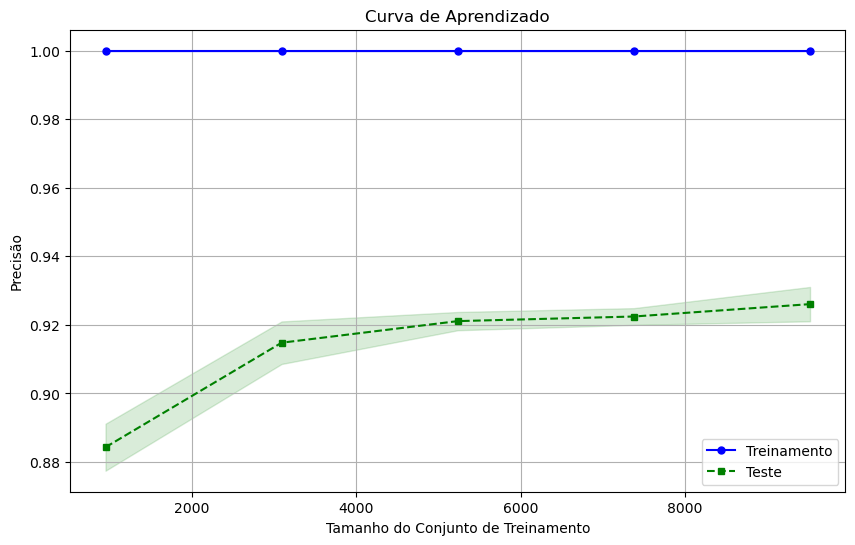

MLPClassifier()


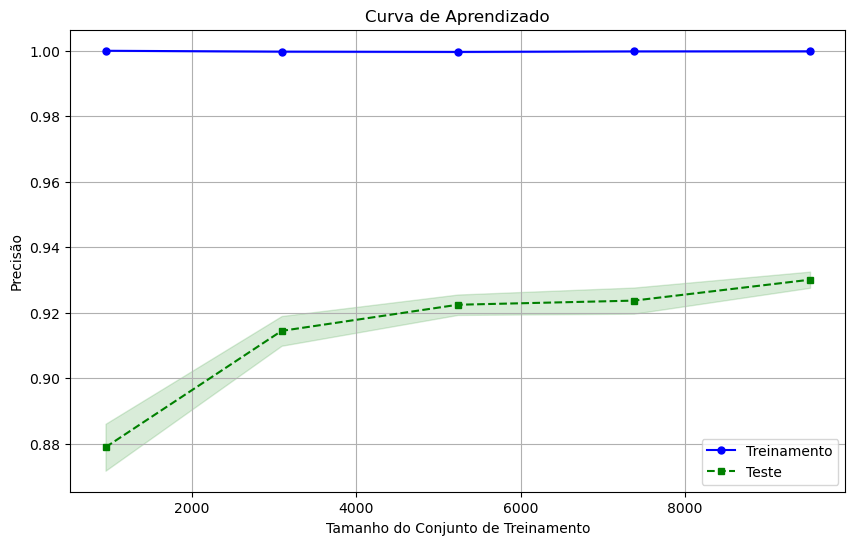

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


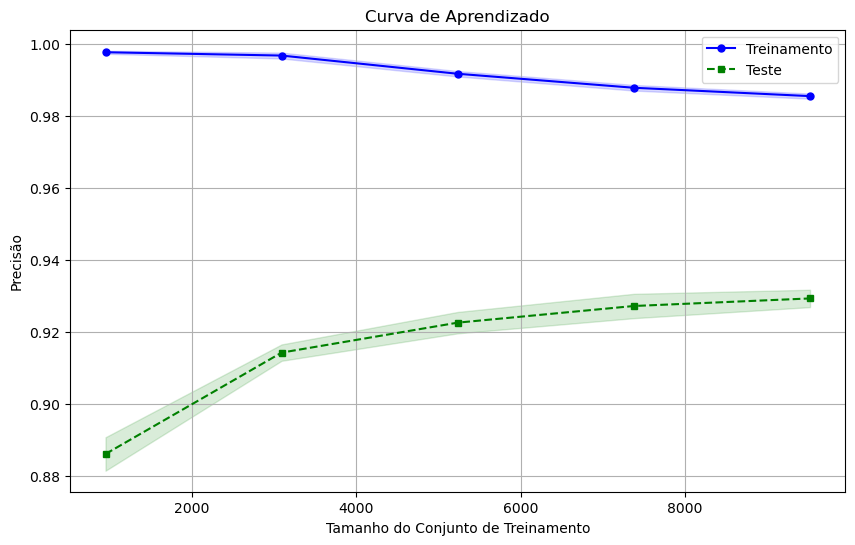

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Média e desvio padrão dos scores de treinamento e teste
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plotagem da curva de aprendizado
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Treinamento')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Teste')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    print(model)
    plt.title('Curva de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Precisão')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Plotar curvas de aprendizado para cada modelo
for model in models:
    plot_learning_curve(model, X, y)

In [31]:
models = [
    MultinomialNB(),
    SVC(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    XGBClassifier()
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

Modelo: MultinomialNB
Acurácia: 0.884502309953801
Precisão: 0.8709422011084719
Recall: 0.9075907590759076
F1-score: 0.888888888888889

Modelo: SVC
Acurácia: 0.9307013859722806
Precisão: 0.9245742092457421
Recall: 0.9405940594059405
F1-score: 0.9325153374233128

Modelo: GradientBoostingClassifier
Acurácia: 0.8920621587568248
Precisão: 0.9036348267117498
Recall: 0.8820132013201321
F1-score: 0.8926931106471816

Modelo: LogisticRegression
Acurácia: 0.9160016799664007
Precisão: 0.9127243066884176
Recall: 0.9232673267326733
F1-score: 0.9179655455291222

Modelo: XGBClassifier
Acurácia: 0.9260814783704326
Precisão: 0.9252873563218391
Recall: 0.9298679867986799
F1-score: 0.9275720164609054



In [54]:
models = [
    #MultinomialNB(),
    #SVC(),
    KNeighborsClassifier(),
    #GradientBoostingClassifier(),

    #LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier(),
    #XGBClassifier()
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

    # Cálculo da matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print("Matriz de Confusão:")
    print(confusion)
    print()

Modelo: KNeighborsClassifier
Acurácia: 0.8345233095338094
Precisão: 0.8089123867069486
Recall: 0.8836633663366337
F1-score: 0.8446372239747635

Matriz de Confusão:
[[ 916  253]
 [ 141 1071]]

Modelo: RandomForestClassifier
Acurácia: 0.9193616127677446
Precisão: 0.9194078947368421
Recall: 0.9224422442244224
F1-score: 0.9209225700164745

Matriz de Confusão:
[[1071   98]
 [  94 1118]]

Modelo: MLPClassifier
Acurácia: 0.9193616127677446
Precisão: 0.9112903225806451
Recall: 0.9323432343234324
F1-score: 0.9216965742251222

Matriz de Confusão:
[[1059  110]
 [  82 1130]]



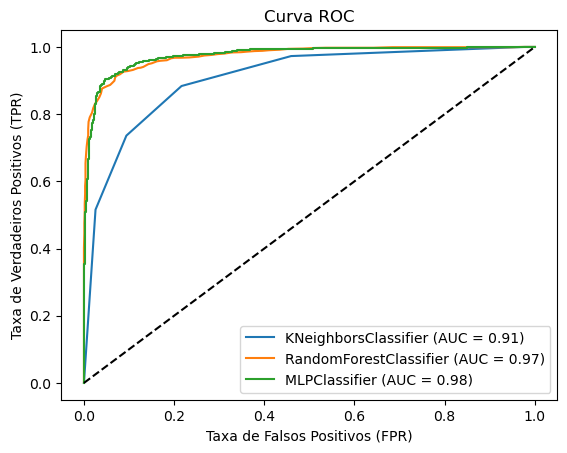

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

for model in models:
    model.fit(X_train, y_train)
    
    # Verificar se o modelo suporta cálculo de probabilidade
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))
    else:
        # Se o modelo não suportar cálculo de probabilidade, use a função de decisão para calcular as pontuações
        y_scores = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## FALSA

In [56]:
for model in models:
    
    print(model)
    fake = 0
    true = 0

    for i in testefake['Noticia']:
        x = manual_testing2(model,i)
        if x == 0:
            #print('Fake News')
            fake += 1
        else:
            #print('Not a Fake News')
            true += 1

    print('Fake: ',fake)
    print('True: ',true)

KNeighborsClassifier()
Fake:  1728
True:  1872
RandomForestClassifier()
Fake:  1855
True:  1745
MLPClassifier()
Fake:  2432
True:  1168


## VERDADEIRA

In [57]:
for model in models:
    
    print(model)
    fake = 0
    true = 0

    for i in testetrue['Noticia']:
        x = manual_testing2(model,i)
        if x == 0:
            #print('Fake News')
            fake += 1
        else:
            #print('Not a Fake News')
            true += 1

    print('Fake: ',fake)
    print('True: ',true)

KNeighborsClassifier()
Fake:  1001
True:  2599
RandomForestClassifier()
Fake:  156
True:  3444
MLPClassifier()
Fake:  695
True:  2905
